In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

plt.style.use('dark_background')

# Load / process data

In [2]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print("X_train.shape:", X_train.shape)
print("X_test.shape: ", X_test.shape)

X_train.shape: (50000, 32, 32, 3)
X_test.shape:  (10000, 32, 32, 3)


In [3]:
## Create extra type feature (0 = vehicle, 1 = animal)
type_train = np.zeros_like(y_train)
type_train[(y_train == 0) | (y_train == 1) | (y_train == 8) | (y_train == 9)] = 1

type_test = np.zeros_like(y_test)
type_test[(y_test == 0) | (y_test == 1) | (y_test == 8) | (y_test == 9)] = 1

# Modeling

In [6]:
# -----------------------------------------------------------
# Build two-input CNN model
# -----------------------------------------------------------
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *

dropout_rate = 0.2
n_classes  = np.unique(y_train).shape[0]

# Image input and CNN
img_input = Input(shape=X_train.shape[1:], name="image_input")

x = Conv2D(8, (3, 3), activation='relu', padding='same')(img_input)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = BatchNormalization()(x)
x = Dropout(dropout_rate)(x)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = BatchNormalization()(x)
x = Dropout(dropout_rate)(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = BatchNormalization()(x)
x = Dropout(dropout_rate)(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = GlobalAveragePooling2D()(x)

# Type input (scalar: 0 or 1)
type_input = Input(shape=(1,), name="type_input")

# Concatenate CNN features with type
concat = Concatenate()([x, type_input])

output = Dense(n_classes, activation='softmax')(concat)

# Final model
model = Model(inputs=[img_input, type_input], outputs=output)
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ image_input (InputLayer)      │ (None, 32, 32, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_8 (Conv2D)             │ (None, 32, 32, 8)         │             224 │ image_input[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_8               │ (None, 16, 16, 8)         │               0 │ conv2d_8[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_7         │ (None, 16, 16, 8)         │              32 │ max_pooling2d_8[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_8 (Dropout)           │ (None, 16, 16, 8)         │               0 │ batch_normalization_7[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_9 (Conv2D)             │ (None, 16, 16, 16)        │           1,168 │ dropout_8[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_9               │ (None, 8, 8, 16)          │               0 │ conv2d_9[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_8         │ (None, 8, 8, 16)          │              64 │ max_pooling2d_9[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_9 (Dropout)           │ (None, 8, 8, 16)          │               0 │ batch_normalization_8[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_10 (Conv2D)            │ (None, 8, 8, 32)          │           4,640 │ dropout_9[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_10              │ (None, 4, 4, 32)          │               0 │ conv2d_10[0][0]            │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_9         │ (None, 4, 4, 32)          │             128 │ max_pooling2d_10[0][0]     │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_10 (Dropout)          │ (None, 4, 4, 32)          │               0 │ batch_normalization_9[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_11 (Conv2D)            │ (None, 4, 4, 64)          │          18,496 │ dropout_10[0][0]           │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 25,412 (99.27 KB)

 Trainable params: 25,300 (98.83 KB)

 Non-trainable params: 112 (448.00 B)

In [8]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

epochs = 15
batch_size = 1000
initial_learning_rate = 0.01

optimizer = Adam(learning_rate=initial_learning_rate)

model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

## Train model

In [9]:
history = model.fit(
    [X_train, type_train], y_train,
    epochs=epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_data=([X_test, type_test], y_test),
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.2998 - loss: 1.9533 - val_accuracy: 0.2612 - val_loss: 2.2373
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.5007 - loss: 1.3575 - val_accuracy: 0.4010 - val_loss: 1.7335
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.5643 - loss: 1.1963 - val_accuracy: 0.4394 - val_loss: 1.7611
Epoch 4/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.6096 - loss: 1.0780 - val_accuracy: 0.5482 - val_loss: 1.2246
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.6325 - loss: 1.0122 - val_accuracy: 0.5704 - val_loss: 1.1801
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.6550 - loss: 0.9475 - val_accuracy: 0.5855 - val_loss: 1.1306
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.6691 - loss: 0.9101 - val_accuracy: 0.6375 - val_loss: 0.9756
Epoch 8/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.6826 - loss: 0.8722 - val_accuracy: 0.6944 - v

## Evaluation

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


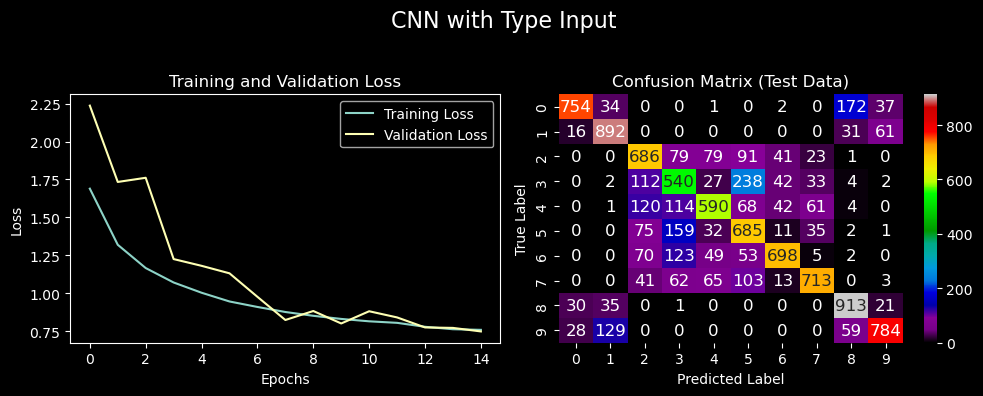

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1000
           1       0.82      0.89      0.85      1000
           2       0.62      0.69      0.65      1000
           3       0.50      0.54      0.52      1000
           4       0.70      0.59      0.64      1000
           5       0.55      0.69      0.61      1000
           6       0.82      0.70      0.76      1000
           7       0.82      0.71      0.76      1000
           8       0.77      0.91      0.83      1000
           9       0.86      0.78      0.82      1000

    accuracy                           0.73     10000
   macro avg       0.74      0.73      0.73     10000
weighted avg       0.74      0.73      0.73     10000



In [10]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions
y_test_pred = model.predict([X_test, type_test]).argmax(axis=1)

# Training plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('CNN with Type Input', fontsize=16)

# Left: loss curves
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Training and Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Right: confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', ax=axes[1], vmin=0,
            annot_kws={"size": 12}, cmap='nipy_spectral')
axes[1].set_title('Confusion Matrix (Test Data)')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_test_pred)
print(report)